In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
import transformers
import bitsandbytes as bnb
import networkx as nx

random_state = 1

In [2]:
def euclid(list1, list2):
    return sum((p-q)**2 for p, q in zip(list1, list2)) ** .5

In [3]:
with open('df_annotations_embeddings.pkl', 'rb') as f:
    df = pickle.load(f)
df

,Document,Split,Name,Id,Text,Type,Scheme,embeddings
0,A2008_Commission of the European Communities v...,1,prem,A1,must held first Article 4c CS prohibits granti...,L,Rule,"[-0.01507568359375, -1.73828125, 1.4287109375,..."
1,A2008_Commission of the European Communities v...,1,prem,A2,Also clear consistent caselaw Articles 4 CS 67...,L,"[Itpr, Prec, Rule]","[0.93017578125, -1.0146484375, 0.0575256347656..."
2,A2008_Commission of the European Communities v...,1,prem,A3,Court deduces Article 67 CS covers general mea...,L,"[Prec, Rule]","[0.195556640625, -1.734375, -0.1546630859375, ..."
3,A2008_Commission of the European Communities v...,1,prem,A4,Court also held action taken Article 67 CS can...,L,"[Prec, Rule]","[0.404296875, -0.2352294921875, 0.34326171875,..."
4,A2008_Commission of the European Communities v...,1,prem,A5,Court held particular inconceivable authors EC...,L,"[Itpr, Prec, Rule]","[1.0849609375, -0.98828125, 0.39453125, 0.8774..."
...,...,...,...,...,...,...,...,...
2530,R2021_World Duty Free v,5,prem,H7,question matter dialogue Spanish authorities C...,F,NaN,"[2.109375, -1.3642578125, -0.62744140625, 2.50..."
2531,R2021_World Duty Free v,5,prem,H8,present case action first instance WDFG compla...,F,NaN,"[0.880859375, -0.65966796875, -0.67626953125, ..."
2532,R2021_World Duty Free v,5,prem,H9,regard General Court recalled paragraph 212 ju...,F,NaN,"[2.0234375, -1.150390625, -0.70947265625, 1.59..."
2533,R2021_World Duty Free v,5,prem,H10,General Court err law concluding therefrom par...,F,NaN,"[1.6494140625, -1.5732421875, -0.857421875, 1...."


In [4]:
df_train = df[df['Split'] != 2]
df_train = df_train[df_train['Name'] == 'conc']
df_train

,Document,Split,Name,Id,Text,Type,Scheme,embeddings
13,A2008_Commission of the European Communities v...,1,conc,A14,Accordingly first limb first plea cannot succe...,NaN,NaN,"[1.029296875, -0.256591796875, 0.399658203125,..."
15,A2008_Commission of the European Communities v...,1,conc,B2,second limb must therefore rejected,NaN,NaN,"[0.387451171875, -0.2332763671875, 1.533203125..."
17,A2008_Commission of the European Communities v...,1,conc,C2,Consequently third limb first plea law must re...,NaN,NaN,"[1.0478515625, -0.40185546875, 0.242919921875,..."
26,A2008_Commission of the European Communities v...,1,conc,D9,Therefore second plea crossappeal alleging fai...,NaN,NaN,"[-0.0212249755859375, -0.7119140625, -0.470458..."
30,A2008_Commission of the European Communities v...,1,conc,E4,Therefore Commission’s second plea must reject...,NaN,NaN,"[0.525390625, -0.33203125, -0.2159423828125, 1..."
...,...,...,...,...,...,...,...,...
2505,R2021_World Duty Free v,5,conc,D19,light considerations must concluded notwithsta...,NaN,NaN,"[1.2392578125, -0.9609375, -1.2236328125, 2.16..."
2512,R2021_World Duty Free v,5,conc,E7,third part WDFG’s single ground appeal fourth ...,NaN,NaN,"[1.09765625, -0.79638671875, -1.0302734375, 1...."
2516,R2021_World Duty Free v,5,conc,F4,Consequently fourth part WDFG’s single ground ...,NaN,NaN,"[0.892578125, -0.378173828125, 0.55224609375, ..."
2522,R2021_World Duty Free v,5,conc,G6,follows fifth part WDFG’s single ground appeal...,NaN,NaN,"[1.2802734375, -0.309814453125, -0.27685546875..."


In [5]:
df_test = df[df['Split'] == 2]
df_test

,Document,Split,Name,Id,Text,Type,Scheme,embeddings
171,A2010_NDSHT Nya Destination Stockholm Hotell &...,2,prem,A1,According Commission argument put forward appe...,F,NaN,"[1.6826171875, -0.91259765625, -1.3779296875, ..."
172,A2010_NDSHT Nya Destination Stockholm Hotell &...,2,prem,A2,regard must observed follows Article 58 Statut...,L,"[Prec, Rule]","[0.5068359375, -1.6494140625, -0.43408203125, ..."
173,A2010_NDSHT Nya Destination Stockholm Hotell &...,2,prem,A3,However clear contrary Commission’s contention...,F,NaN,"[1.1826171875, -0.26806640625, -1.0615234375, ..."
174,A2010_NDSHT Nya Destination Stockholm Hotell &...,2,prem,A4,Therefore even assuming argument expressed app...,F,NaN,"[1.2353515625, -0.330810546875, -0.15393066406..."
175,A2010_NDSHT Nya Destination Stockholm Hotell &...,2,conc,A5,follows argument admissible,NaN,NaN,"[0.71728515625, 0.11212158203125, 1.1337890625..."
...,...,...,...,...,...,...,...,...
2133,R2017_European Commission v Frucona Košice a,2,prem,D23,second place far Commission claims errors law ...,F,NaN,"[1.0791015625, -0.86865234375, -1.0322265625, ..."
2134,R2017_European Commission v Frucona Košice a,2,prem,D24,Moreover paragraphs 279 282 283 judgment appea...,F,NaN,"[0.68603515625, -1.6240234375, 0.56103515625, ..."
2135,R2017_European Commission v Frucona Košice a,2,prem,D25,considerations far concern information normall...,"[F, L]",Prec,"[0.62255859375, -1.1865234375, -0.74951171875,..."
2136,R2017_European Commission v Frucona Košice a,2,prem,D26,Furthermore follows paragraphs 69 84 present j...,F,NaN,"[0.84228515625, -1.5498046875, -0.044708251953..."


In [6]:
distances = []
for j in range(len(df_train)):
    newlist = []
    for i in range(len(df_train)):
        newlist.append(euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']))
    distances.append(newlist)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137


sqrt(137*25) = 58.523

In [65]:
closenodes = []
for el in distances:
    count = 0
    for newel in el:
        if newel <= 20.36:      #set manually, with 48.81 on average the extracted subgraph has (N*25)**0.5 nodes, with 23.72 the nodes are connected to 1% of other nodes, on average
                                #with 41.88, subgraph has half nodes,                                               with 27.44, 2%
                                #with  67.80, subgraph has double nodes                                             with 20.36, 0.5%
            count += 1
    closenodes.append(count)

print(sum(closenodes)/len(closenodes))  #average size of extracted subgraph
print(min(closenodes))                  #min degree
print(max(closenodes))                  #max degree

1.6956521739130435
1
6


In [66]:
Training_graph = nx.Graph()     #1%

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 23.72:      #così in media ogni nodo è collegato all'1% degli altri nodi, in media
            Training_graph.add_edge(i,j)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

In [67]:
pickle.dump(Training_graph, open('concgraph_task1_.01.pickle', 'wb'))


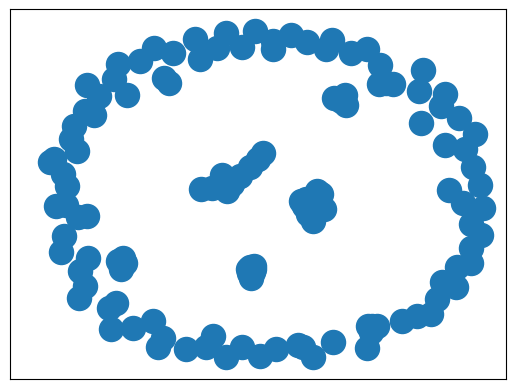

In [68]:
nx.draw_networkx(Training_graph, with_labels = False)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

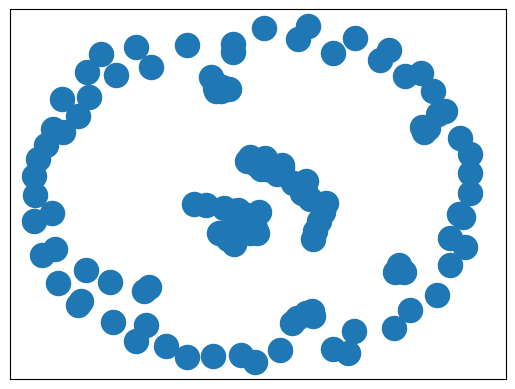

In [69]:
Training_graph = nx.Graph()     #2%

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 27.44:      #così in media ogni nodo è collegato all'2% degli altri nodi, in media
            Training_graph.add_edge(i,j)

pickle.dump(Training_graph, open('concgraph_task1_.02.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)


adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48
adding node 49
adding node 50
adding node 51
adding node 52
adding node 53
adding node 54
adding node 55
adding node 56
adding node 57
adding node 58
adding node 59
adding node 60
adding node 61
adding node 62
adding node 63
adding node 64
adding node 65
adding node 66
addin

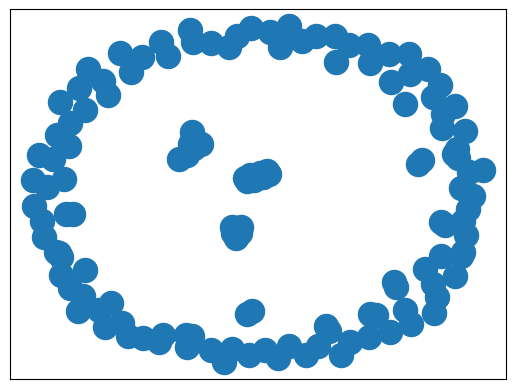

In [70]:
Training_graph = nx.Graph()     #.5%

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 20.36:      #così in media ogni nodo è collegato all'.5% degli altri nodi, in media
            Training_graph.add_edge(i,j)

pickle.dump(Training_graph, open('concgraph_task1_.005.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)
